Name:  

    read_ISCPP

Purpose:  

    Script to read the iscpp cloud cover data in IEEE floating point 
    number format
    taken from the website: http://isccp.giss.nasa.gov/products/browsed2.html
  
Input:

    none at command line
  
Output:

    figures...
  
Dependencies:

    - struct
    - matplotlib
    - basemap
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - iscpp SQ downloaded file: renamed to ISCPP_D2_CLDCOVER_sq_20151207.ieee
  
Modification History:

    Written: Samuel LeBlanc, NASA Ames, Santa Cruz, CA, 2015-12-07

In [12]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import struct
from mpl_toolkits.basemap import Basemap
%matplotlib notebook
import numpy as np

In [13]:
fp='C:/Users/sleblan2/Research/sat/iscpp/'

## Load the ieee file

In [17]:
ff = fp+'ISCPP_D2_CLDCOVER_sq_20151207.ieee'
f = open(ff,'rb')

In [18]:
n = 10368
num = struct.unpack('{}f'.format(n),f.read(4*n))

In [19]:
f.close()

In [20]:
cld = np.array(num)

In [21]:
cld.shape

(10368L,)

In [35]:
lat = np.arange(72)*2.5-90.0+1.25
lon = np.arange(144)*2.5-180.0+1.25

In [36]:
lat

array([-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75, -71.25,
       -68.75, -66.25, -63.75, -61.25, -58.75, -56.25, -53.75, -51.25,
       -48.75, -46.25, -43.75, -41.25, -38.75, -36.25, -33.75, -31.25,
       -28.75, -26.25, -23.75, -21.25, -18.75, -16.25, -13.75, -11.25,
        -8.75,  -6.25,  -3.75,  -1.25,   1.25,   3.75,   6.25,   8.75,
        11.25,  13.75,  16.25,  18.75,  21.25,  23.75,  26.25,  28.75,
        31.25,  33.75,  36.25,  38.75,  41.25,  43.75,  46.25,  48.75,
        51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,  68.75,
        71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75])

In [51]:
cv = cld.reshape(72,144)

<IPython.core.display.Javascript object>


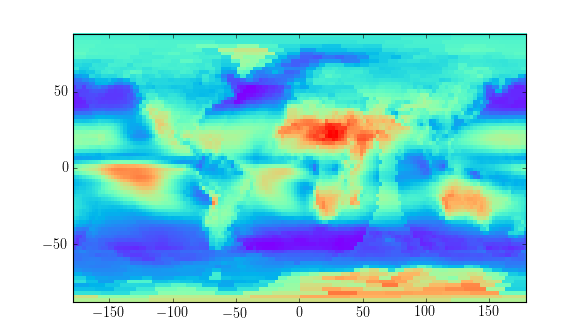

In [53]:
fig,ax = plt.subplots(1)
ax.pcolorfast(lon,lat,cv,cmap=plt.cm.rainbow_r)

In [55]:
print 'Average cloud cover at :{}'.format(cv.mean())

Average cloud cover at :66.6037151133


In [54]:
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,20.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,420.,60.))
mlon, mlat = np.meshgrid(lon,lat,sparse=False)
x,y=m(mlon, mlat) 
cs = m.contourf(x,y,cv,np.linspace(0,100,21))
cbar = plt.colorbar(cs)
cbar.set_label('Cloud Cover [\%]')
plt.savefig(fp+'ISCPP_CLDCOVER_mean_annual.png',dpi=600,transparent=True)

In [46]:
import cmaps
cmaps.cmaps()